In [55]:
# %pip install pandas
# %pip install numpy
# %pip install contractions
# %pip install bs4
# %pip install nltk
# %pip install unidecode
# %pip install matplotlib
# %pip install wordcloud
# %pip install scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (112 kB)
Using cached scikit_learn-1.4.1.post1-cp310-cp310-macosx_12_0_arm64.whl (10.4 MB)
Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl (31.4 MB)
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [57]:
import pandas as pd
import gzip
import json
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import contractions
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
# from acronym import Acronym


# Df loading function

In [4]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  folder = parse(path)
  for d in folder:
    print(i)
    df[i] = d
    i += 1
  return df



In [ ]:
df = getDF('Electronics_5.json.gz')
data_frame = pd.DataFrame.from_dict(df, orient='index')
data_frame.to_csv('data_frame.csv', index=False)

In [ ]:
df = getDF('meta_Electronics.json.gz')
meta_df = pd.DataFrame.from_dict(df, orient='index')
meta_df.to_csv('meta_data.csv', index=False, escapechar='\\')

In [3]:
data = pd.read_csv("data_frame.csv")
meta_data = pd.read_csv("meta_data.csv")

/var/folders/4f/kjgrgc293tn7cn556xk1h1g40000gn/T/ipykernel_15093/1755724970.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_frame.csv")
/var/folders/4f/kjgrgc293tn7cn556xk1h1g40000gn/T/ipykernel_15093/1755724970.py:2: DtypeWarning: Columns (3,6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pd.read_csv("meta_data.csv")


In [25]:
product_indices = []
product = 'USB Cables'
for i in range(len(meta_data)):
    if product in meta_data['category'][i]:
        product_indices.append(i)

product_meta_data_df = meta_data.iloc[product_indices]
product_meta_data_df = product_meta_data_df.dropna(subset=['title', 'asin'])
product_meta_data_df = product_meta_data_df.drop_duplicates()

product_df= pd.merge(data, product_meta_data_df, on='asin', how='inner')
product_df = product_df.dropna(subset=['overall'])
product_df = product_df.drop_duplicates()

14310

In [ ]:

def expand_acronyms(text):
    expanded_words = []    
    for word in text.split():
        expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_accented_chars(text):
    return unidecode(text)
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
def normalize_text(text):
    text = text.lower()
    text = expand_acronyms(text)
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text


def generate_wordcloud(text_list, title):
    text = ' '.join(text_list)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

    # Plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
  
    plt.show()

In [ ]:
product_df['reviewText'] = product_df['reviewText'].astype(str)
for i in range(len(product_df)):
    print(i)
    pre_text =  normalize_text(product_df['reviewText'].iloc[i])
    product_df.loc[i, "reviewText"]=pre_text
    
product_df.to_csv('product.csv', index=False)

In [42]:
product_df = pd.read_csv("product.csv")
product_df['date'] = pd.to_datetime(product_df['date'], format='%B %d, %Y', errors='coerce')
product_df['reviewText'] = product_df['reviewText'].astype(str)
product_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124237 entries, 0 to 124236
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   overall          120806 non-null  float64       
 1   vote             7329 non-null    object        
 2   verified         120806 non-null  object        
 3   reviewTime       120806 non-null  object        
 4   reviewerID       120806 non-null  object        
 5   asin             120806 non-null  object        
 6   style            68955 non-null   object        
 7   reviewerName     120775 non-null  object        
 8   reviewText       124237 non-null  object        
 9   summary          120784 non-null  object        
 10  unixReviewTime   120806 non-null  float64       
 11  image            1181 non-null    object        
 12  category         120806 non-null  object        
 13  tech1            51449 non-null   object        
 14  description      120

/var/folders/4f/kjgrgc293tn7cn556xk1h1g40000gn/T/ipykernel_974/2996743397.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  product_df = pd.read_csv("product.csv")


In [25]:
total_reviews = product_df['reviewText'].count()
average_rating = product_df['overall'].mean()
num_unique_products = product_df['asin'].nunique()
good_ratings = product_df[product_df['overall'] >= 3]['overall'].count()
bad_ratings = product_df[product_df['overall'] < 3]['overall'].count()
rating_counts = product_df['overall'].value_counts().sort_index()

# Display the results
print(" . Number of rows for the product:", len(product_df))
print("a. Number of Reviews:", total_reviews)
print("b. Average Rating Score:", average_rating)
print("c. Number of Unique Products:", num_unique_products)
print("d. Number of Good Ratings:", good_ratings)
print("e. Number of Bad Ratings:", bad_ratings)
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)


 . Number of rows for the product: 123833
a. Number of Reviews: 123745
b. Average Rating Score: 4.365503369037961
c. Number of Unique Products: 2591
d. Number of Good Ratings: 107710
e. Number of Bad Ratings: 13096
f. Number of Reviews corresponding to each Rating:
overall
1.0     8621
2.0     4475
3.0     6809
4.0    15124
5.0    85777
Name: count, dtype: int64


In [11]:
import warnings
import tqdm

# Raise all warnings as exceptions
warnings.filterwarnings("ignore")

In [26]:
top_20_most_reviewed_brands = product_df['brand'].value_counts().head(20)
top_20_least_reviewed_brands = product_df['brand'].value_counts().tail(20)
most_positively_reviewed_headphone = product_df.groupby('title')['overall'].mean().nlargest(1)
good_ratings_review = product_df[product_df['overall'] >= 3]
bad_ratings_review = product_df[product_df['overall'] < 3]
year_with_max_reviews = product_df['date'].dt.year.value_counts().idxmax()
year_with_max_customers = product_df.groupby(product_df['date'].dt.year)['reviewerID'].nunique().idxmax()

print("a. Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)
print("b. Top 20 least reviewed brands:")
print(top_20_least_reviewed_brands)
print("c. Most positively reviewed headphone:")
print(most_positively_reviewed_headphone)
print("g. Year with maximum reviews:", year_with_max_reviews)
print("h. Year with the highest number of customers:", year_with_max_customers)

a. Top 20 most reviewed brands:
brand
AmazonBasics      15395
Cable Matters      8674
Mediabridge        5585
StarTech           5052
Anker              3914
Belkin             3622
INSTEN             2682
Monoprice          2526
Generic            2093
iSeekerKit         1631
C2G                1466
Sabrent            1394
Samsung            1302
C&E                1212
Mission Cables     1169
Tripp Lite         1168
TRENDnet           1124
CableCreation      1045
UGREEN             1037
Eversame            989
Name: count, dtype: int64
b. Top 20 least reviewed brands:
brand
Innovate Motorsports    5
CoverON                 5
Philips                 5
D-Link                  5
maxinbuy                5
F.DORLA                 5
KKmoon                  5
Clarion                 5
Weiup                   5
SODIAL                  5
LINESO                  5
WIT Inc.                5
X-EDITION               5
TEVIWIN                 5
HQRP                    5
TTMSTUFF                5
B

d.
107710 13096


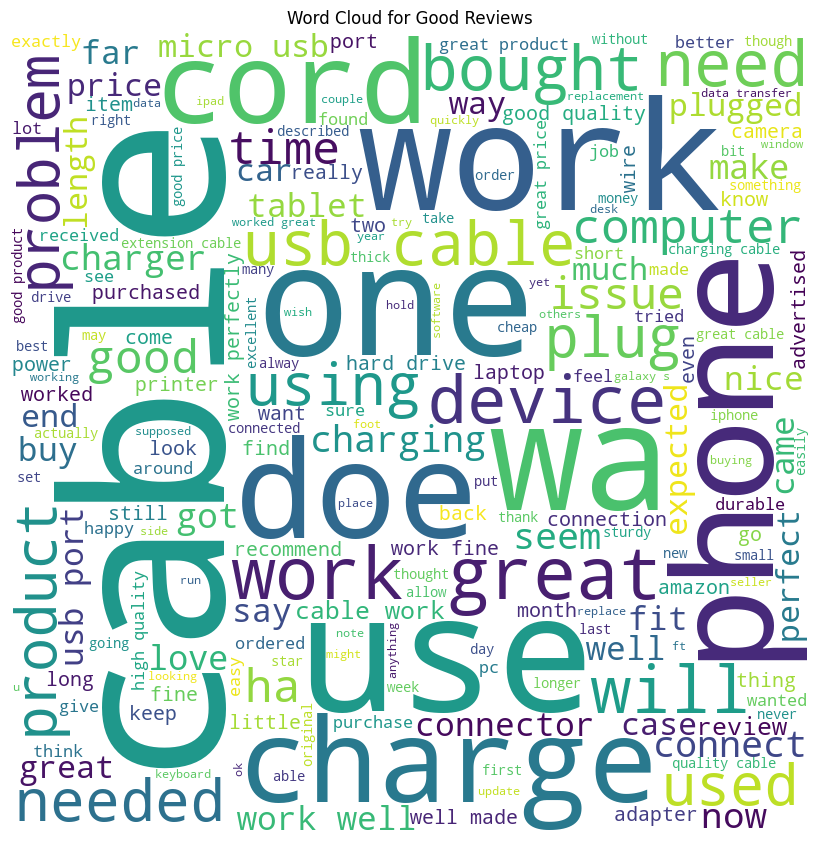

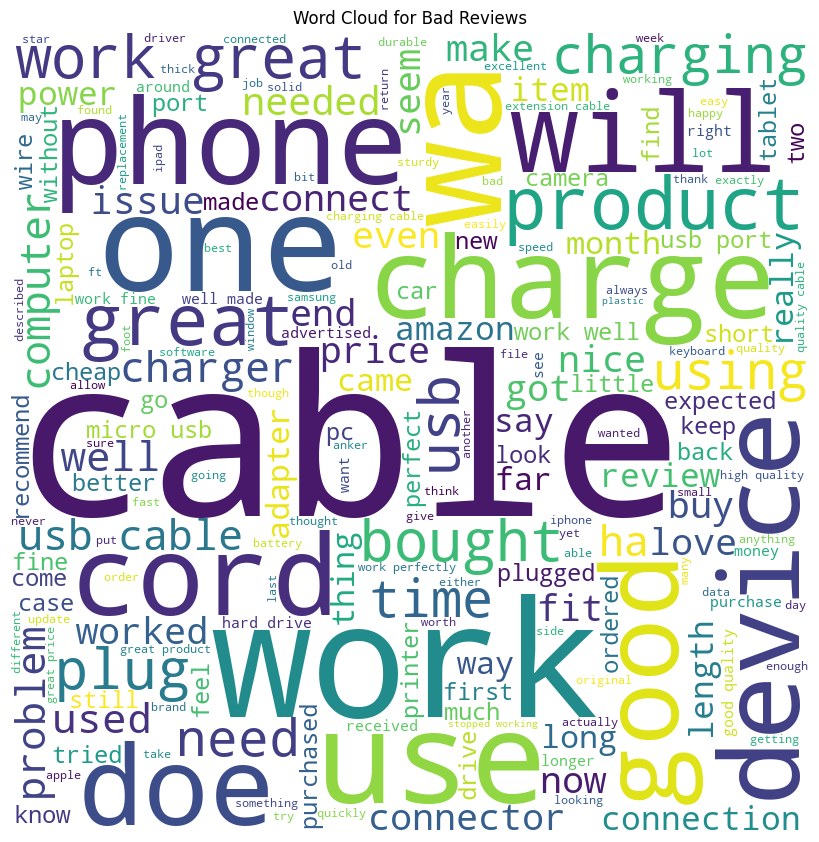

In [63]:
print("d.")
good_ratings_review =list(product_df[product_df['overall'] >= 3]['reviewText'])
bad_ratings_review = list(product_df[product_df['overall'] < 3]['reviewText'])
print(len(good_ratings_review), len(bad_ratings_review))
generate_wordcloud(good_ratings_review, 'Word Cloud for Good Reviews')
generate_wordcloud(bad_ratings_review, 'Word Cloud for Bad Reviews')

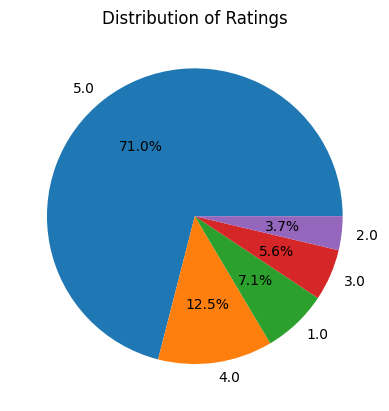

In [36]:
print("e.")
ratings_distribution = product_df['overall'].value_counts()
ratings_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.show()

In [ ]:
ratings_over_years = product_df.set_index('date').groupby(pd.Grouper(freq='Y')).size().head(100)
print("f. Count of ratings for the product over 5 consecutive years:")
print(ratings_over_years)

In [81]:
good_threshold = 4.0
bad_threshold = 3.0

product_df = product_df.dropna(subset=['overall', 'reviewText'])
product_df['Rating Class'] = product_df['overall'].apply(lambda x: 'Good' if x >= good_threshold else ('Average' if x == bad_threshold else 'Bad'))

# print(product_df['Rating Class'].value_counts())
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(product_df['Rating Class'])

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(product_df['reviewText'])
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    # 'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    print(f'Model: {name}')
    print(report)

(120806, 36636)


/Users/nalishjain/Acad Sem 6/IR/CSE508_Winter2024_A3_2021543/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nalishjain/Acad Sem 6/IR/CSE508_Winter2024_A3_2021543/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nalishjain/Acad Sem 6/IR/CSE508_Winter2024_A3_2021543/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

Model: Logistic Regression
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00      1659
     Average       0.59      0.01      0.01      3281
        Good       0.84      1.00      0.91     25262

    accuracy                           0.84     30202
   macro avg       0.48      0.34      0.31     30202
weighted avg       0.76      0.84      0.76     30202

